In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [393]:
# load data
transaction = pd.read_csv('E:\\PriceElasticity_datasets\Cafe - Transaction - Store.csv')
sold = pd.read_csv('E:\\PriceElasticity_datasets\Cafe - Sell Meta Data.csv')
date_info = pd.read_csv('E:\\PriceElasticity_datasets\DateInfo.csv')

## check the proportion missing values

In [394]:
transaction.isnull().mean()

STORE            0.0
CALENDAR_DATE    0.0
PRICE            0.0
QUANTITY         0.0
SELL_ID          0.0
SELL_CATEGORY    0.0
dtype: float64

In [395]:
sold.isnull().mean()

SELL_ID          0.0
SELL_CATEGORY    0.0
ITEM_ID          0.0
ITEM_NAME        0.0
dtype: float64

In [396]:
date_info.isnull().mean()

CALENDAR_DATE          0.000000
YEAR                   0.000000
HOLIDAY                0.922165
IS_WEEKEND             0.000000
IS_SCHOOLBREAK         0.000000
AVERAGE_TEMPERATURE    0.000000
IS_OUTDOOR             0.000000
dtype: float64

In [397]:
# fill in the missing values
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")

In [398]:
date_info.isnull().mean()

CALENDAR_DATE          0.0
YEAR                   0.0
HOLIDAY                0.0
IS_WEEKEND             0.0
IS_SCHOOLBREAK         0.0
AVERAGE_TEMPERATURE    0.0
IS_OUTDOOR             0.0
dtype: float64

## Drop Dupilcates

In [399]:
transaction = transaction.drop_duplicates()
date_info = date_info.drop_duplicates()
sold = sold.drop_duplicates()

## drop unnecessary columns

In [400]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5401 entries, 0 to 5403
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STORE          5401 non-null   int64  
 1   CALENDAR_DATE  5401 non-null   object 
 2   PRICE          5401 non-null   float64
 3   QUANTITY       5401 non-null   int64  
 4   SELL_ID        5401 non-null   int64  
 5   SELL_CATEGORY  5401 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 295.4+ KB


In [401]:
transaction = transaction.drop('STORE',axis= 1)

In [402]:
transaction

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,1/1/12,15.50,46,1070,0
1,1/1/12,12.73,22,2051,2
2,1/1/12,12.75,18,2052,2
3,1/1/12,12.60,30,2053,2
4,1/2/12,15.50,70,1070,0
...,...,...,...,...,...
5399,9/9/15,11.26,54,2053,2
5400,9/10/15,14.50,96,1070,0
5401,9/10/15,12.19,30,2051,2
5402,9/10/15,11.50,18,2052,2


In [403]:
date_info

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0
...,...,...,...,...,...,...,...
1344,9/6/15,2015,No Holiday,1,0,75.2,1
1345,9/7/15,2015,No Holiday,0,0,77.0,1
1346,9/8/15,2015,No Holiday,0,0,73.4,1
1347,9/9/15,2015,No Holiday,0,0,71.6,1


In [404]:
date_info = date_info.drop('YEAR' , axis =1)

In [405]:
date_info

,CALENDAR_DATE,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,New Year,1,0,24.8,0
1,1/2/12,New Year,0,0,24.8,0
2,1/3/12,New Year,0,0,32.0,1
3,1/4/12,No Holiday,0,0,32.0,1
4,1/5/12,No Holiday,0,0,24.8,0
...,...,...,...,...,...,...
1344,9/6/15,No Holiday,1,0,75.2,1
1345,9/7/15,No Holiday,0,0,77.0,1
1346,9/8/15,No Holiday,0,0,73.4,1
1347,9/9/15,No Holiday,0,0,71.6,1


In [406]:
sold

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER
5,2051,2,5030,COKE
6,2052,2,7821,BURGER
7,2052,2,6249,LEMONADE
8,2053,2,7821,BURGER
9,2053,2,5030,COKE


In [407]:
np.unique(date_info['HOLIDAY'])


array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [408]:
date_info['CALENDAR_DATE'].min()


'1/1/12'

In [409]:
date_info['CALENDAR_DATE'].max()


'9/9/15'

In [410]:
date_info.shape

(1349, 6)

In [411]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()
data1 = pd.merge(sold.drop(['ITEM_ID'],axis=1), transaction.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
data1.head(20)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,1/1/12,15.5,46
1,1070,0,BURGER,1/2/12,15.5,70
2,1070,0,BURGER,1/3/12,15.5,62
3,1070,0,BURGER,1/4/12,15.5,88
4,1070,0,BURGER,1/5/12,15.5,104
5,1070,0,BURGER,1/6/12,15.5,100
6,1070,0,BURGER,1/7/12,15.5,70
7,1070,0,BURGER,1/8/12,15.5,70
8,1070,0,BURGER,1/9/12,15.5,106
9,1070,0,BURGER,1/10/12,15.5,108


In [412]:
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()
data1.shape


(10802, 6)

In [413]:
intermediate_data = b.reset_index()

In [414]:
data1.shape

(10802, 6)

In [415]:
b.shape

(10792,)

In [416]:
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,1/1/12,15.5,46
1,1070,0,BURGER,1/1/13,15.5,60
2,1070,0,BURGER,1/1/14,15.5,72
3,1070,0,BURGER,1/1/15,14.0,66
4,1070,0,BURGER,1/10/12,15.5,108


In [417]:
combined_data = pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
combined_data.head(50)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/1/12,15.50,46,New Year,1,0,24.8,0
1,2051,2,BURGER,1/1/12,12.73,22,New Year,1,0,24.8,0
2,2051,2,COKE,1/1/12,12.73,22,New Year,1,0,24.8,0
3,2052,2,BURGER,1/1/12,12.75,18,New Year,1,0,24.8,0
4,2052,2,LEMONADE,1/1/12,12.75,18,New Year,1,0,24.8,0
5,2053,2,BURGER,1/1/12,12.60,30,New Year,1,0,24.8,0
6,2053,2,COFFEE,1/1/12,12.60,30,New Year,1,0,24.8,0
7,2053,2,COKE,1/1/12,12.60,30,New Year,1,0,24.8,0
8,1070,0,BURGER,1/1/13,15.50,60,New Year,0,0,30.2,1
9,2051,2,BURGER,1/1/13,13.13,22,New Year,0,0,30.2,1


In [418]:
combined_data.shape

(10808, 11)

In [419]:
np.unique(combined_data['HOLIDAY'])
np.unique(combined_data['IS_WEEKEND'])
np.unique(combined_data['IS_SCHOOLBREAK'])

array([0, 1], dtype=int64)

In [420]:
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0)& (combined_data['IS_OUTDOOR']==1)]
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
176,1070,0,BURGER,1/14/14,15.50,86,No Holiday,0,0,28.4,1
177,2051,2,BURGER,1/14/14,13.27,24,No Holiday,0,0,28.4,1
178,2051,2,COKE,1/14/14,13.27,24,No Holiday,0,0,28.4,1
179,2052,2,BURGER,1/14/14,11.96,26,No Holiday,0,0,28.4,1
180,2052,2,LEMONADE,1/14/14,11.96,26,No Holiday,0,0,28.4,1


In [421]:
np.unique(bau_data['HOLIDAY'])
np.unique(bau_data['IS_WEEKEND'])
np.unique(bau_data['IS_SCHOOLBREAK'])

array([0], dtype=int64)

## Data Exploration

(array([2492.,    0.,    0., 1246.,    0.,    0.,  623.,    0.,    0.,
         623.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

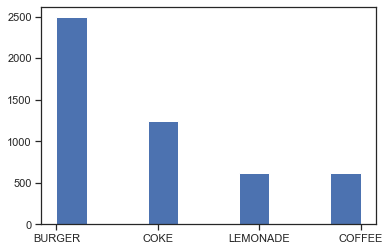

In [422]:
plt.hist(bau_data.ITEM_NAME)

(array([ 563.,  543.,  584., 1465., 1056.,  148.,  163.,  152.,  218.,
          92.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

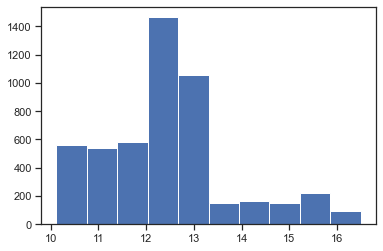

In [423]:
plt.hist(bau_data.PRICE)

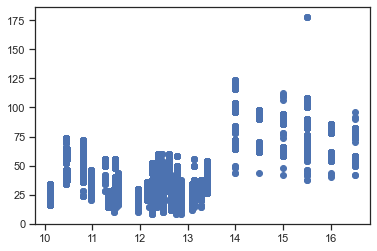

In [424]:
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])

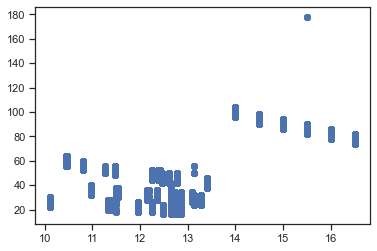

In [425]:
plt.scatter(bau_data['PRICE'], bau_data['QUANTITY'])

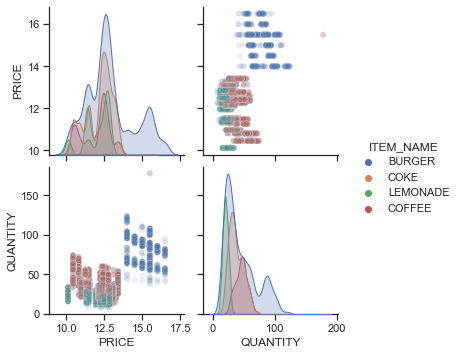

In [426]:
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

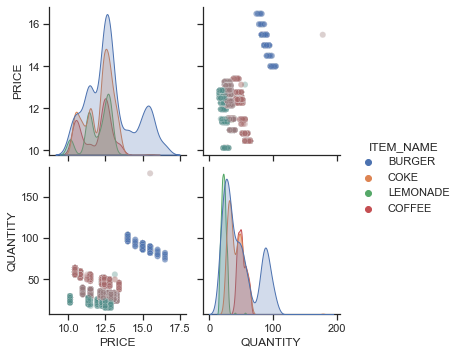

In [427]:
sns.pairplot(bau_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

In [428]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/1/12,15.50,46,New Year,1,0,24.8,0
1,2051,2,BURGER,1/1/12,12.73,22,New Year,1,0,24.8,0
3,2052,2,BURGER,1/1/12,12.75,18,New Year,1,0,24.8,0
5,2053,2,BURGER,1/1/12,12.60,30,New Year,1,0,24.8,0
8,1070,0,BURGER,1/1/13,15.50,60,New Year,0,0,30.2,1


In [429]:
burger.describe()

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,5404.00000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,1806.50000,1.500000,12.868729,44.402665,0.284974,0.204293,56.295337,0.862324
std,425.25841,0.866106,1.563922,25.605601,0.451444,0.403221,20.223179,0.344591
min,1070.00000,0.000000,10.120000,8.000000,0.000000,0.000000,14.000000,0.000000
25%,1805.75000,1.500000,11.530000,24.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.50000,2.000000,12.640000,36.000000,0.000000,0.000000,60.800000,1.000000
75%,2052.25000,2.000000,13.557500,60.000000,1.000000,0.000000,75.200000,1.000000
max,2053.00000,2.000000,16.500000,178.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

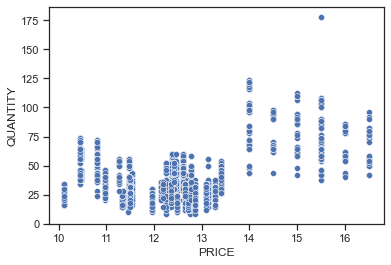

In [430]:
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

From the above scatter plot it is clearly visible that there must be different types of burgers being sold. Now let's see the same distributin whenwe differentiate with SELL_ID which indicates if the burger was a part of the combo and hence, must be treated separately

In [431]:
np.unique(combined_data.SELL_ID)

array([1070, 2051, 2052, 2053], dtype=int64)

In [432]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 2], dtype=int64)

In [433]:
burger_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 1070)]
burger_1070.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/1/12,15.5,46,New Year,1,0,24.8,0
8,1070,0,BURGER,1/1/13,15.5,60,New Year,0,0,30.2,1
16,1070,0,BURGER,1/1/14,15.5,72,New Year,0,0,19.4,0
24,1070,0,BURGER,1/1/15,14.0,66,New Year,0,0,37.4,1
32,1070,0,BURGER,1/10/12,15.5,108,No Holiday,0,0,24.8,0


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

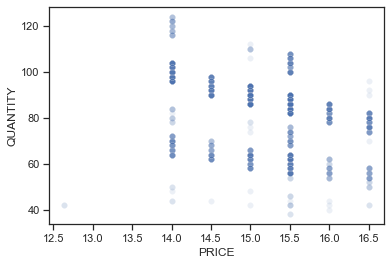

In [434]:
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

In [435]:
# for the combined data
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     167.7
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.10e-36
Time:                        22:28:28   Log-Likelihood:                -5620.8
No. Observations:                1351   AIC:                         1.125e+04
Df Residuals:                    1349   BIC:                         1.126e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    191.8188      8.535     22.474      0.0

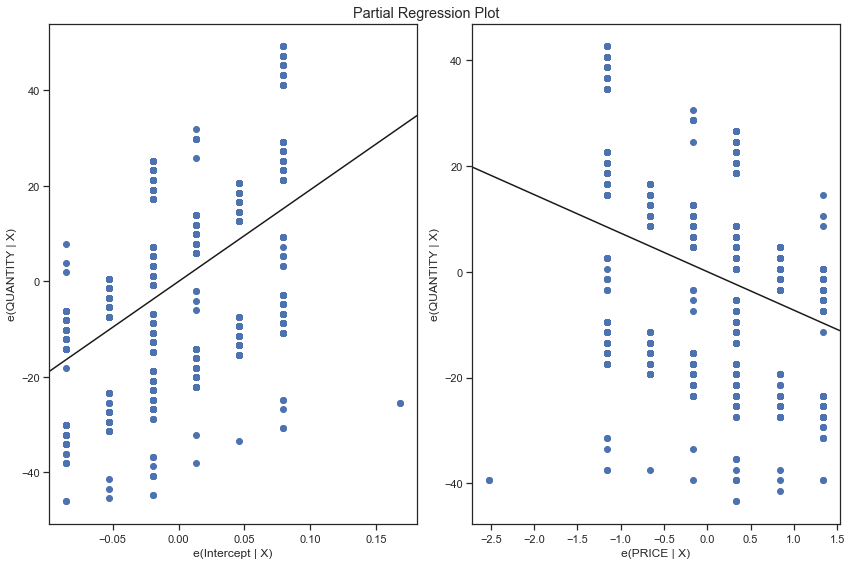

In [436]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,623.0,623.0,623.000000,623.000000,623.0,623.0,623.00000,623.0
mean,1070.0,0.0,15.124045,89.142857,0.0,0.0,57.69695,1.0
std,0.0,0.0,0.722906,7.331635,0.0,0.0,16.81881,0.0
min,1070.0,0.0,12.640000,42.000000,0.0,0.0,26.60000,1.0
25%,1070.0,0.0,14.500000,84.000000,0.0,0.0,41.00000,1.0
50%,1070.0,0.0,15.000000,88.000000,0.0,0.0,59.00000,1.0
75%,1070.0,0.0,15.500000,94.000000,0.0,0.0,73.40000,1.0
max,1070.0,0.0,16.500000,104.000000,0.0,0.0,87.80000,1.0


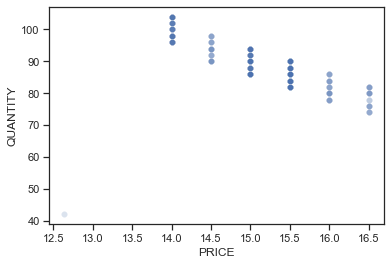

In [437]:
# for the bau_data
burger_1070 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 1070)]
sns.scatterplot(data = burger_1070 , x = burger_1070.PRICE , y = burger_1070.QUANTITY , alpha =0.1)
burger_1070.describe()

As you can see, the scatter plot is much cleaner. Although there does seem to be 2 separate trends

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     826.7
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.09e-116
Time:                        22:28:29   Log-Likelihood:                -1861.0
No. Observations:                 623   AIC:                             3726.
Df Residuals:                     621   BIC:                             3735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    205.0532      4.036     50.807      0.0

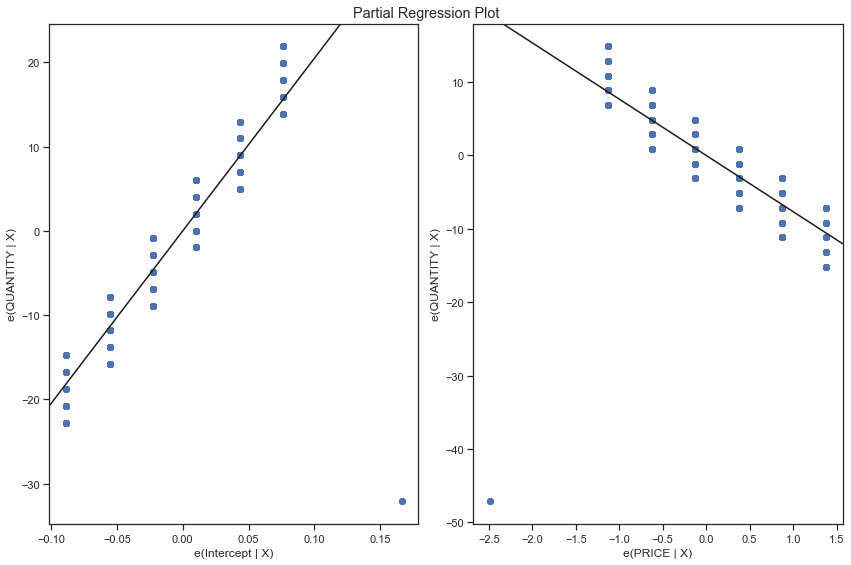

In [438]:
burger_1070_model = ols("QUANTITY ~ PRICE" , data = burger_1070).fit()
print(burger_1070_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_1070_model, fig=fig)

In [439]:
burger_2051 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 2051)]
burger_2051.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
177,2051,2,BURGER,1/14/14,13.27,24,No Holiday,0,0,28.4,1
217,2051,2,BURGER,1/15/15,11.53,36,No Holiday,0,0,32.0,1
249,2051,2,BURGER,1/16/15,11.53,32,No Holiday,0,0,32.0,1
377,2051,2,BURGER,1/2/15,11.53,30,No Holiday,0,0,37.4,1
609,2051,2,BURGER,1/27/12,12.73,28,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,623.0,623.0,623.000000,623.000000,623.0,623.0,623.00000,623.0
mean,2051.0,2.0,12.310353,32.080257,0.0,0.0,57.69695,1.0
std,0.0,0.0,0.752657,9.150403,0.0,0.0,16.81881,0.0
min,2051.0,2.0,10.970000,24.000000,0.0,0.0,26.60000,1.0
25%,2051.0,2.0,11.530000,28.000000,0.0,0.0,41.00000,1.0
50%,2051.0,2.0,12.350000,32.000000,0.0,0.0,59.00000,1.0
75%,2051.0,2.0,12.870000,34.000000,0.0,0.0,73.40000,1.0
max,2051.0,2.0,15.500000,178.000000,0.0,0.0,87.80000,1.0


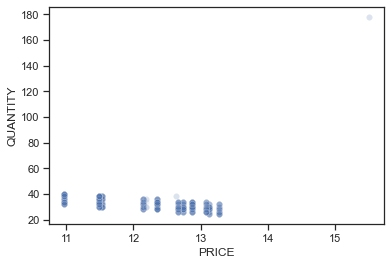

In [440]:
sns.scatterplot(data = burger_2051, x = burger_2051.PRICE, y = burger_2051.QUANTITY, alpha = 0.1)
burger_2051.describe()

In [441]:
burger_2052 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 2052)]
burger_2052.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
179,2052,2,BURGER,1/14/14,11.96,26,No Holiday,0,0,28.4,1
219,2052,2,BURGER,1/15/15,11.45,28,No Holiday,0,0,32.0,1
251,2052,2,BURGER,1/16/15,11.45,22,No Holiday,0,0,32.0,1
379,2052,2,BURGER,1/2/15,11.45,22,No Holiday,0,0,37.4,1
611,2052,2,BURGER,1/27/12,12.75,18,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,623.0,623.0,623.000000,623.000000,623.0,623.0,623.00000,623.0
mean,2052.0,2.0,11.968395,22.182986,0.0,0.0,57.69695,1.0
std,0.0,0.0,0.844002,4.177558,0.0,0.0,16.81881,0.0
min,2052.0,2.0,10.120000,16.000000,0.0,0.0,26.60000,1.0
25%,2052.0,2.0,11.360000,20.000000,0.0,0.0,41.00000,1.0
50%,2052.0,2.0,12.260000,22.000000,0.0,0.0,59.00000,1.0
75%,2052.0,2.0,12.720000,24.000000,0.0,0.0,73.40000,1.0
max,2052.0,2.0,13.410000,56.000000,0.0,0.0,87.80000,1.0


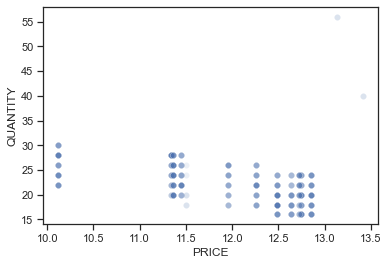

In [442]:
sns.scatterplot(data = burger_2052, x = burger_2052.PRICE, y = burger_2052.QUANTITY, alpha = 0.1)
burger_2052.describe()

In [443]:
burger_2053 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 2053)]
burger_2053.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
181,2053,2,BURGER,1/14/14,12.37,52,No Holiday,0,0,28.4,1
221,2053,2,BURGER,1/15/15,10.81,56,No Holiday,0,0,32.0,1
253,2053,2,BURGER,1/16/15,10.81,60,No Holiday,0,0,32.0,1
381,2053,2,BURGER,1/2/15,10.81,60,No Holiday,0,0,37.4,1
613,2053,2,BURGER,1/27/12,12.60,46,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,623.0,623.0,623.000000,623.000000,623.0,623.0,623.00000,623.0
mean,2053.0,2.0,11.879695,50.812199,0.0,0.0,57.69695,1.0
std,0.0,0.0,0.988806,6.613956,0.0,0.0,16.81881,0.0
min,2053.0,2.0,10.450000,38.000000,0.0,0.0,26.60000,1.0
25%,2053.0,2.0,10.810000,46.000000,0.0,0.0,41.00000,1.0
50%,2053.0,2.0,12.370000,50.000000,0.0,0.0,59.00000,1.0
75%,2053.0,2.0,12.600000,56.000000,0.0,0.0,73.40000,1.0
max,2053.0,2.0,13.410000,64.000000,0.0,0.0,87.80000,1.0


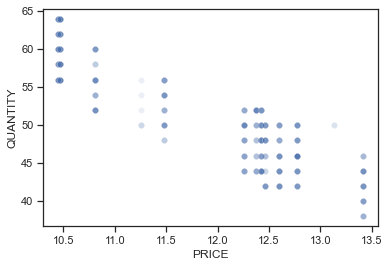

In [444]:
sns.scatterplot(data = burger_2053, x = burger_2053.PRICE, y = burger_2053.QUANTITY, alpha = 0.1)
burger_2053.describe()

In [445]:
coke = bau_data[bau_data['ITEM_NAME'] == 'COKE']
coke.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
178,2051,2,COKE,1/14/14,13.27,24,No Holiday,0,0,28.4,1
183,2053,2,COKE,1/14/14,12.37,52,No Holiday,0,0,28.4,1
218,2051,2,COKE,1/15/15,11.53,36,No Holiday,0,0,32.0,1
223,2053,2,COKE,1/15/15,10.81,56,No Holiday,0,0,32.0,1
250,2051,2,COKE,1/16/15,11.53,32,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1246.000000,1246.0,1246.000000,1246.000000,1246.0,1246.0,1246.000000,1246.0
mean,2052.000000,2.0,12.095024,41.446228,0.0,0.0,57.696950,1.0
std,1.000402,0.0,0.904377,12.307633,0.0,0.0,16.812055,0.0
min,2051.000000,2.0,10.450000,24.000000,0.0,0.0,26.600000,1.0
25%,2051.000000,2.0,11.490000,32.000000,0.0,0.0,41.000000,1.0
50%,2052.000000,2.0,12.370000,40.000000,0.0,0.0,59.000000,1.0
75%,2053.000000,2.0,12.770000,50.000000,0.0,0.0,73.400000,1.0
max,2053.000000,2.0,15.500000,178.000000,0.0,0.0,87.800000,1.0


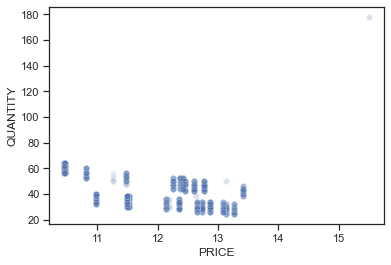

In [446]:
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)
coke.describe()

In [447]:
np.unique(coke.SELL_ID)

array([2051, 2053], dtype=int64)

In [448]:
coke_2051 = bau_data[(bau_data['ITEM_NAME'] == 'COKE') & (bau_data['SELL_ID'] == 2051)]
coke_2051.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
178,2051,2,COKE,1/14/14,13.27,24,No Holiday,0,0,28.4,1
218,2051,2,COKE,1/15/15,11.53,36,No Holiday,0,0,32.0,1
250,2051,2,COKE,1/16/15,11.53,32,No Holiday,0,0,32.0,1
378,2051,2,COKE,1/2/15,11.53,30,No Holiday,0,0,37.4,1
610,2051,2,COKE,1/27/12,12.73,28,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,623.0,623.0,623.000000,623.000000,623.0,623.0,623.00000,623.0
mean,2051.0,2.0,12.310353,32.080257,0.0,0.0,57.69695,1.0
std,0.0,0.0,0.752657,9.150403,0.0,0.0,16.81881,0.0
min,2051.0,2.0,10.970000,24.000000,0.0,0.0,26.60000,1.0
25%,2051.0,2.0,11.530000,28.000000,0.0,0.0,41.00000,1.0
50%,2051.0,2.0,12.350000,32.000000,0.0,0.0,59.00000,1.0
75%,2051.0,2.0,12.870000,34.000000,0.0,0.0,73.40000,1.0
max,2051.0,2.0,15.500000,178.000000,0.0,0.0,87.80000,1.0


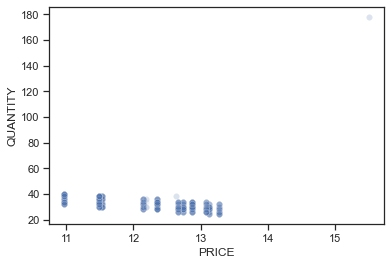

In [449]:
sns.scatterplot(x = coke_2051.PRICE, y = coke_2051.QUANTITY , alpha = 0.1)
coke_2051.describe()

In [450]:
coke_2053 = bau_data[(bau_data['ITEM_NAME'] == 'COKE') & (bau_data['SELL_ID'] == 2053)]
coke_2053.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
183,2053,2,COKE,1/14/14,12.37,52,No Holiday,0,0,28.4,1
223,2053,2,COKE,1/15/15,10.81,56,No Holiday,0,0,32.0,1
255,2053,2,COKE,1/16/15,10.81,60,No Holiday,0,0,32.0,1
383,2053,2,COKE,1/2/15,10.81,60,No Holiday,0,0,37.4,1
615,2053,2,COKE,1/27/12,12.60,46,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,623.0,623.0,623.000000,623.000000,623.0,623.0,623.00000,623.0
mean,2053.0,2.0,11.879695,50.812199,0.0,0.0,57.69695,1.0
std,0.0,0.0,0.988806,6.613956,0.0,0.0,16.81881,0.0
min,2053.0,2.0,10.450000,38.000000,0.0,0.0,26.60000,1.0
25%,2053.0,2.0,10.810000,46.000000,0.0,0.0,41.00000,1.0
50%,2053.0,2.0,12.370000,50.000000,0.0,0.0,59.00000,1.0
75%,2053.0,2.0,12.600000,56.000000,0.0,0.0,73.40000,1.0
max,2053.0,2.0,13.410000,64.000000,0.0,0.0,87.80000,1.0


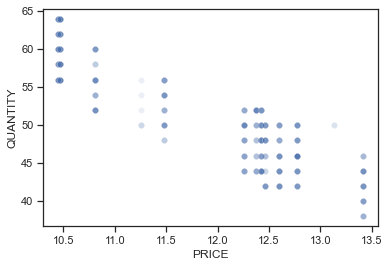

In [451]:
sns.scatterplot(x = coke_2053.PRICE, y = coke_2053.QUANTITY , alpha = 0.1)
coke_2053.describe()

In [452]:
Coffee = bau_data[bau_data['ITEM_NAME'] == 'COFFEE']
Coffee.head()


,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
182,2053,2,COFFEE,1/14/14,12.37,52,No Holiday,0,0,28.4,1
222,2053,2,COFFEE,1/15/15,10.81,56,No Holiday,0,0,32.0,1
254,2053,2,COFFEE,1/16/15,10.81,60,No Holiday,0,0,32.0,1
382,2053,2,COFFEE,1/2/15,10.81,60,No Holiday,0,0,37.4,1
614,2053,2,COFFEE,1/27/12,12.60,46,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,623.0,623.0,623.000000,623.000000,623.0,623.0,623.00000,623.0
mean,2053.0,2.0,11.879695,50.812199,0.0,0.0,57.69695,1.0
std,0.0,0.0,0.988806,6.613956,0.0,0.0,16.81881,0.0
min,2053.0,2.0,10.450000,38.000000,0.0,0.0,26.60000,1.0
25%,2053.0,2.0,10.810000,46.000000,0.0,0.0,41.00000,1.0
50%,2053.0,2.0,12.370000,50.000000,0.0,0.0,59.00000,1.0
75%,2053.0,2.0,12.600000,56.000000,0.0,0.0,73.40000,1.0
max,2053.0,2.0,13.410000,64.000000,0.0,0.0,87.80000,1.0


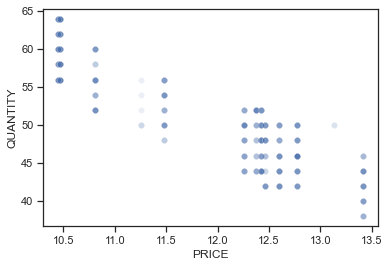

In [453]:
sns.scatterplot(x = Coffee.PRICE, y = Coffee.QUANTITY , alpha = 0.1)
Coffee.describe()

In [454]:
np.unique(Coffee.SELL_ID)

array([2053], dtype=int64)

In [455]:
# for the bau_data
lemonade = bau_data[bau_data['ITEM_NAME'] == 'LEMONADE']
lemonade.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
180,2052,2,LEMONADE,1/14/14,11.96,26,No Holiday,0,0,28.4,1
220,2052,2,LEMONADE,1/15/15,11.45,28,No Holiday,0,0,32.0,1
252,2052,2,LEMONADE,1/16/15,11.45,22,No Holiday,0,0,32.0,1
380,2052,2,LEMONADE,1/2/15,11.45,22,No Holiday,0,0,37.4,1
612,2052,2,LEMONADE,1/27/12,12.75,18,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,623.0,623.0,623.000000,623.000000,623.0,623.0,623.00000,623.0
mean,2052.0,2.0,11.968395,22.182986,0.0,0.0,57.69695,1.0
std,0.0,0.0,0.844002,4.177558,0.0,0.0,16.81881,0.0
min,2052.0,2.0,10.120000,16.000000,0.0,0.0,26.60000,1.0
25%,2052.0,2.0,11.360000,20.000000,0.0,0.0,41.00000,1.0
50%,2052.0,2.0,12.260000,22.000000,0.0,0.0,59.00000,1.0
75%,2052.0,2.0,12.720000,24.000000,0.0,0.0,73.40000,1.0
max,2052.0,2.0,13.410000,56.000000,0.0,0.0,87.80000,1.0


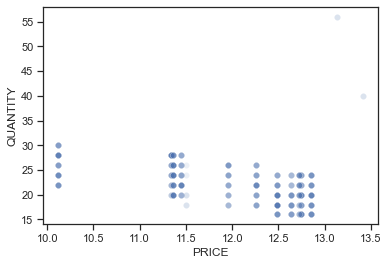

In [456]:
sns.scatterplot(x = lemonade.PRICE, y = lemonade.QUANTITY , alpha = 0.1)
lemonade.describe()

In [457]:
np.unique(lemonade.SELL_ID)

array([2052], dtype=int64)

##### the presence of multiple instances of the same SELL_ID in correspondence with distinct ITEM_IDs, makes us think that SELL_ID is the identifier of products that can be single items or a combo of items. For example, the combo with SELL_ID = 2053 is made by the items BURGER, COKE and COFFEE. The products with SELL_ID 1070 is instead single item.

In [458]:
product_2051 = bau_data[ bau_data.SELL_ID == 2051]

In [459]:
product_2051

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
177,2051,2,BURGER,1/14/14,13.27,24,No Holiday,0,0,28.4,1
178,2051,2,COKE,1/14/14,13.27,24,No Holiday,0,0,28.4,1
217,2051,2,BURGER,1/15/15,11.53,36,No Holiday,0,0,32.0,1
218,2051,2,COKE,1/15/15,11.53,36,No Holiday,0,0,32.0,1
249,2051,2,BURGER,1/16/15,11.53,32,No Holiday,0,0,32.0,1
...,...,...,...,...,...,...,...,...,...,...,...
10786,2051,2,COKE,9/9/13,10.97,40,No Holiday,0,0,75.2,1
10793,2051,2,BURGER,9/9/14,12.87,32,No Holiday,0,0,71.6,1
10794,2051,2,COKE,9/9/14,12.87,32,No Holiday,0,0,71.6,1
10801,2051,2,BURGER,9/9/15,12.19,34,No Holiday,0,0,71.6,1


In [460]:
np.unique(product_2051.ITEM_NAME)

array(['BURGER', 'COKE'], dtype=object)

In [461]:
product_2052 = bau_data[ bau_data.SELL_ID == 2052]

In [462]:
product_2052

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
179,2052,2,BURGER,1/14/14,11.96,26,No Holiday,0,0,28.4,1
180,2052,2,LEMONADE,1/14/14,11.96,26,No Holiday,0,0,28.4,1
219,2052,2,BURGER,1/15/15,11.45,28,No Holiday,0,0,32.0,1
220,2052,2,LEMONADE,1/15/15,11.45,28,No Holiday,0,0,32.0,1
251,2052,2,BURGER,1/16/15,11.45,22,No Holiday,0,0,32.0,1
...,...,...,...,...,...,...,...,...,...,...,...
10788,2052,2,LEMONADE,9/9/13,10.12,24,No Holiday,0,0,75.2,1
10795,2052,2,BURGER,9/9/14,12.85,16,No Holiday,0,0,71.6,1
10796,2052,2,LEMONADE,9/9/14,12.85,16,No Holiday,0,0,71.6,1
10803,2052,2,BURGER,9/9/15,11.50,18,No Holiday,0,0,71.6,1


In [463]:
np.unique(product_2052.ITEM_NAME)

array(['BURGER', 'LEMONADE'], dtype=object)

In [464]:
product_2053 = bau_data[ bau_data.SELL_ID == 2053]

In [465]:
product_2053

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
181,2053,2,BURGER,1/14/14,12.37,52,No Holiday,0,0,28.4,1
182,2053,2,COFFEE,1/14/14,12.37,52,No Holiday,0,0,28.4,1
183,2053,2,COKE,1/14/14,12.37,52,No Holiday,0,0,28.4,1
221,2053,2,BURGER,1/15/15,10.81,56,No Holiday,0,0,32.0,1
222,2053,2,COFFEE,1/15/15,10.81,56,No Holiday,0,0,32.0,1
...,...,...,...,...,...,...,...,...,...,...,...
10798,2053,2,COFFEE,9/9/14,12.77,42,No Holiday,0,0,71.6,1
10799,2053,2,COKE,9/9/14,12.77,42,No Holiday,0,0,71.6,1
10805,2053,2,BURGER,9/9/15,11.26,54,No Holiday,0,0,71.6,1
10806,2053,2,COFFEE,9/9/15,11.26,54,No Holiday,0,0,71.6,1


In [466]:
np.unique(product_2053.ITEM_NAME)

array(['BURGER', 'COFFEE', 'COKE'], dtype=object)

Remove Outliers from PRICE and QUANTITY columns 

In [467]:
q1 = burger_1070['PRICE'].quantile(0.25)
q3 = burger_1070['PRICE'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
burger_1070 = burger_1070[(burger_1070['PRICE'] > lower_bound) & (burger_1070['PRICE'] < upper_bound)]

In [468]:
q1 = burger_1070['QUANTITY'].quantile(0.25)
q3 = burger_1070['QUANTITY'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
burger_1070 = burger_1070[(burger_1070['QUANTITY'] > lower_bound) & (burger_1070['QUANTITY'] < upper_bound)]

In [469]:
q1 = product_2051['PRICE'].quantile(0.25)
q3 = product_2051['PRICE'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
product_2051 = product_2051[(product_2051['PRICE'] > lower_bound) & (product_2051['PRICE'] < upper_bound)]

In [470]:
q1 = product_2051['QUANTITY'].quantile(0.25)
q3 = product_2051['QUANTITY'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
product_2051 = product_2051[(product_2051['QUANTITY'] > lower_bound) & (product_2051['QUANTITY'] < upper_bound)]

In [471]:
q1 = product_2052['PRICE'].quantile(0.25)
q3 = product_2052['PRICE'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
product_2052 = product_2052[(product_2052['PRICE'] > lower_bound) & (product_2052['PRICE'] < upper_bound)]

In [472]:
q1 = product_2052['QUANTITY'].quantile(0.25)
q3 = product_2052['QUANTITY'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
product_2052 = product_2052[(product_2052['QUANTITY'] > lower_bound) & (product_2052['QUANTITY'] < upper_bound)]

In [473]:
q1 = product_2053['PRICE'].quantile(0.25)
q3 = product_2053['PRICE'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
product_2053 = product_2053[(product_2053['PRICE'] > lower_bound) & (product_2053['PRICE'] < upper_bound)]

In [474]:
q1 = product_2053['QUANTITY'].quantile(0.25)
q3 = product_2053['QUANTITY'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
product_2053 = product_2053[(product_2053['QUANTITY'] > lower_bound) & (product_2053['QUANTITY'] < upper_bound)]

In [475]:
elasticities = {}

In [476]:
def create_model_and_find_elasticity(data,P,Q):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1] * (P/Q)
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elasticity of the product: -1.4775242540124596
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     2826.
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.41e-233
Time:                        22:28:32   Log-Likelihood:                -1541.3
No. Observations:                 621   AIC:                             3087.
Df Residuals:                     619   BIC:                             3096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

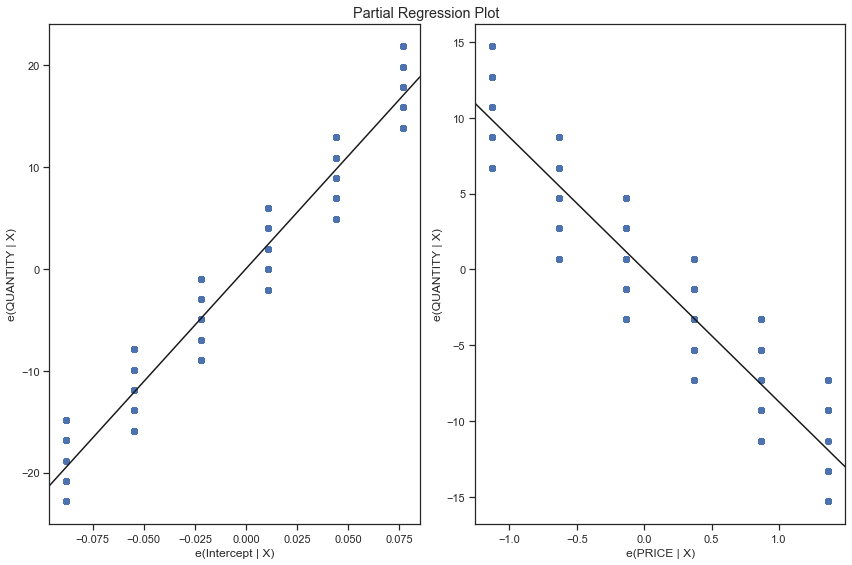

In [477]:
elasticities['burger_1070'], model_burger_1070 = create_model_and_find_elasticity(burger_1070,burger_1070.PRICE.mean(),burger_1070.QUANTITY.mean())

Price elasticity of the product: -1.3816617445502477
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     1003.
Date:                Wed, 10 May 2023   Prob (F-statistic):          7.97e-162
Time:                        22:28:32   Log-Likelihood:                -3078.7
No. Observations:                1242   AIC:                             6161.
Df Residuals:                    1240   BIC:                             6172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

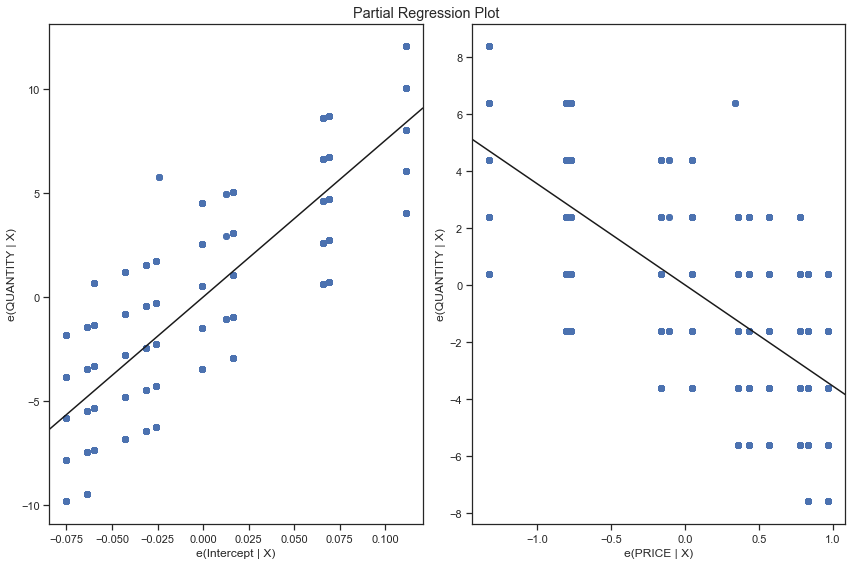

In [478]:
elasticities['product_2051'], model_product_2051 = create_model_and_find_elasticity(product_2051, product_2051.PRICE.mean(), product_2051.QUANTITY.mean())

Price elasticity of the product: -1.3635873866105601
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     633.2
Date:                Wed, 10 May 2023   Prob (F-statistic):          7.96e-113
Time:                        22:28:33   Log-Likelihood:                -2982.9
No. Observations:                1218   AIC:                             5970.
Df Residuals:                    1216   BIC:                             5980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

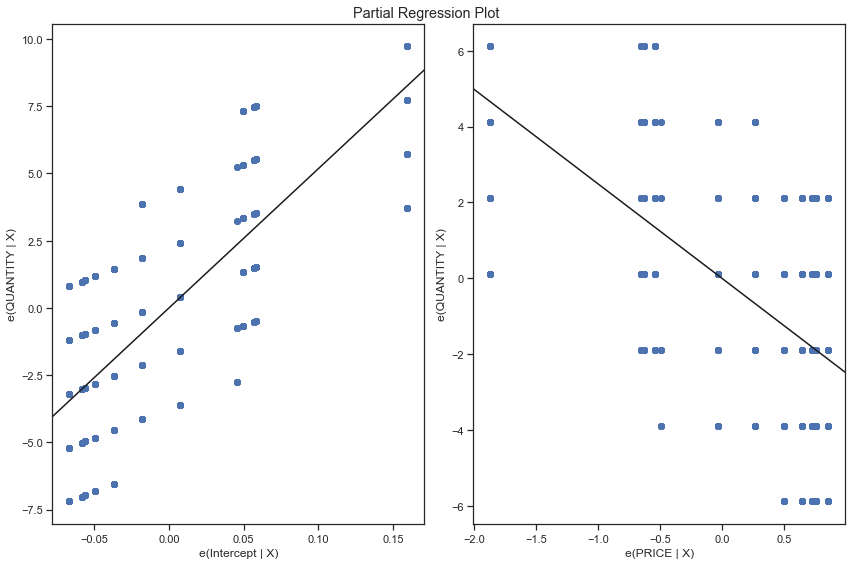

In [479]:
elasticities['product_2052'], model_product_2052 = create_model_and_find_elasticity(product_2052 , product_2052.PRICE.mean(), product_2052.QUANTITY.mean())

Price elasticity of the product: -1.3999745771282732
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     7535.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        22:28:33   Log-Likelihood:                -4670.7
No. Observations:                1869   AIC:                             9345.
Df Residuals:                    1867   BIC:                             9356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

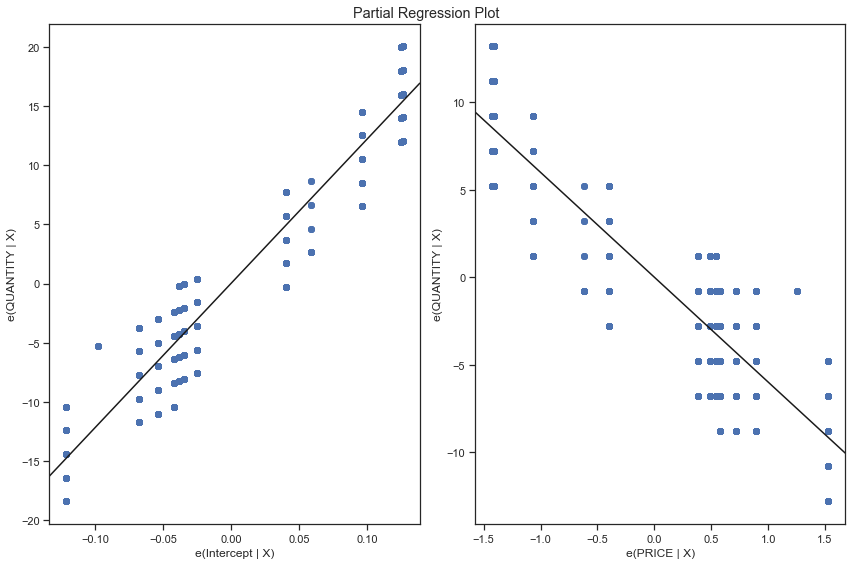

In [480]:
elasticities['product_2053'], model_product_2053 = create_model_and_find_elasticity(product_2053, product_2053.PRICE.mean(), product_2053.QUANTITY.mean())

In [481]:
elasticities

{'burger_1070': -1.4775242540124596,
 'product_2051': -1.3816617445502477,
 'product_2052': -1.3635873866105601,
 'product_2053': -1.3999745771282732}